# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [ ]:
import numpy as np  cc

v = np.array([720, 980, 650, 1200])

tot = v.sum()
print("La spesa totale mensile è: ", tot)

milledue=((v[3]/100)*12)
v[3]=milledue+v[3]

v[2]=v[2]-((v[2]/100)*10)

v[1]=v[1]+((v[1]/100)*5)
v[0]=v[0]+((v[0]/100)*5)

print("La spesa totale mensile dopo le modifiche: ", v.sum())
perc=(144*100)/(v.sum())
print("La spesa dell'affitto più alto è di ", milledue, " euro in più di prima, che è il ", perc, "% della nuova spesa totale")

La spesa totale mensile è:  3550
La spesa totale mensile dopo le modifiche:  3714
La spesa dell'affitto più alto è di  144.0  euro in più di prima, che è il  3.877221324717286 % della nuova spesa totale


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

[np.float64(0.0), np.float64(0.1), np.float64(0.3), np.float64(0.3), np.float64(0.4), np.float64(0.0), np.float64(-0.2), np.float64(-0.5), np.float64(-0.4), np.float64(-0.9), np.float64(-0.9), np.float64(-0.7), np.float64(-0.5), np.float64(-0.4), np.float64(-0.3), np.float64(-0.1), np.float64(-0.3), np.float64(-0.1), np.float64(-0.2), np.float64(0.1), np.float64(0.3), np.float64(0.2), np.float64(0.3), np.float64(0.2), np.float64(0.2), np.float64(0.1), np.float64(-0.2), np.float64(-0.3), np.float64(-0.5), np.float64(-0.3), np.float64(-0.6), np.float64(-0.9), np.float64(-0.8), np.float64(-0.8), np.float64(-1.1), np.float64(-1.1), np.float64(-1.3), np.float64(-1.7), np.float64(-1.8), np.float64(-2.1), np.float64(-1.7), np.float64(-1.6), np.float64(-1.3), np.float64(-1.1), np.float64(-0.9), np.float64(-1.0), np.float64(-0.9), np.float64(-0.9), np.float64(-0.6), np.float64(-0.4), np.float64(-0.3), np.float64(-0.3), np.float64(-0.6), np.float64(-0.3), np.float64(-0.4), np.float64(-0.4), np.f

C:\Users\celes\AppData\Local\Temp\ipykernel_5436\480164135.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


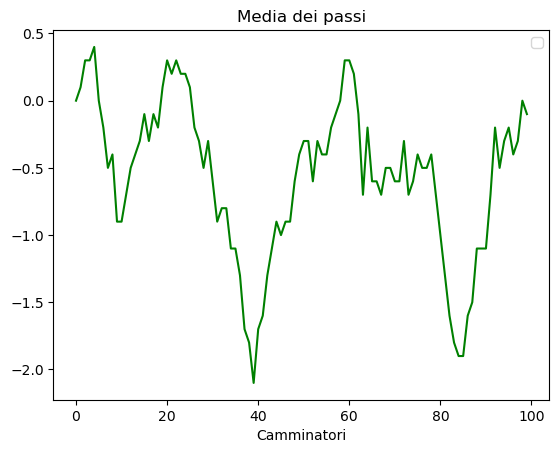

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def conta(n, p):
    tot=pd.Series(dtype=object)     #cammini
    cs=0
    for i in range(1,p+1):
        passi = np.random.choice([-1,1], size=n)
        cs=np.cumsum(passi)
        tot.loc[i]=cs
    
    m = list()                        #medie
    ds = list()                       #deviazione standard
    for i in range(n):
        posizioni = [tot[l][i] for l in tot.index]
        media = np.mean(posizioni)
        d=np.std(posizioni, ddof=1)
        ds.append(d)
        m.append(media)
    return m, ds

n = 100
p = 20
media, devst=conta(n,p)
print(media)
print(devst)

plt.plot(media, color="green")
plt.title("Media dei passi")
plt.legend()
plt.xlabel("Passi")
plt.ylabel("Posizione media")
plt.show()


## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [17]:
import numpy as np
import random
import pandas as pd

np.random.seed(42)
a = np.random.normal(0, 1, (5,9))

vicini=[]

for riga in a:
    min=np.argmin(np.abs(riga-0.1))
    numero=riga[min]
    vicini.append(numero)
vicini

[np.float64(-0.13826430117118466),
 np.float64(0.24196227156603412),
 np.float64(0.11092258970986608),
 np.float64(-0.013497224737933921),
 np.float64(0.1713682811899705)]

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


I 10 passeggeri con tariffa pagata più alta: 
     PassengerId  Survived  Pclass  \
679          680         1       1   
258          259         1       1   
737          738         1       1   
88            89         1       1   
438          439         0       1   
341          342         1       1   
27            28         0       1   
742          743         1       1   
311          312         1       1   
299          300         1       1   

                                                Name     Sex   Age  SibSp  \
679               Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
258                                 Ward, Miss. Anna  female  35.0      0   
737                           Lesurer, Mr. Gustave J    male  35.0      0   
88                        Fortune, Miss. Mabel Helen  female  23.0      3   
438                                Fortune, Mr. Mark    male  64.0      1   
341                   Fortune, Miss. Alice Elizabeth  female  24.0      3

C:\Users\celes\AppData\Local\Temp\ipykernel_8380\741978544.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


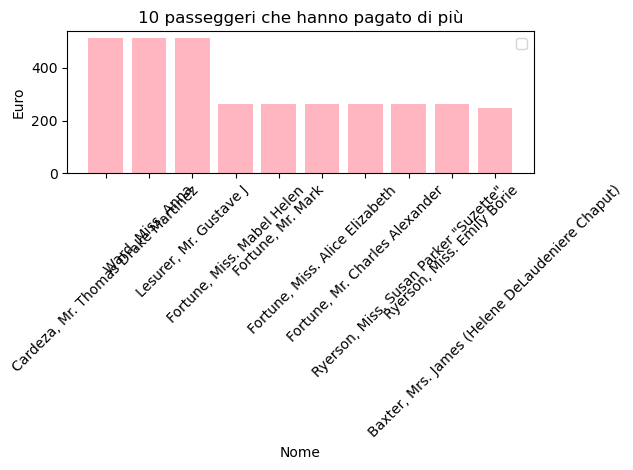

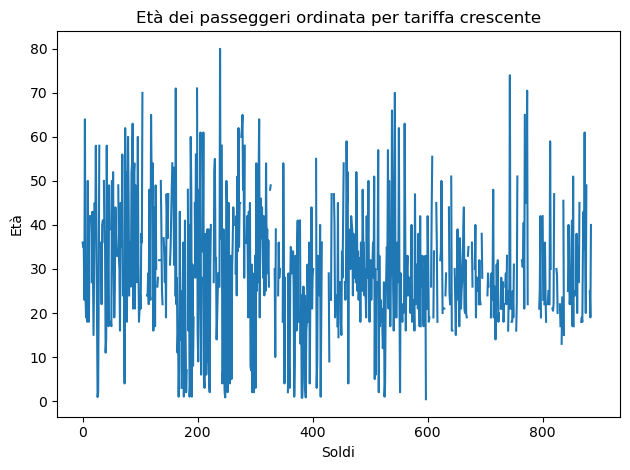

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

print("I 10 passeggeri con tariffa pagata più alta: ")
dieci =df.sort_values(by="Fare", ascending=False,inplace=False).head(10)
print(dieci)

#Age, Fare, SibSp
print("La media degli anni è di ", df["Age"].mean(), " anni")
print("La media dei soldi pagati è di ", df["Fare"].mean(), " euro")
print("La media di fratelli/coniugi a bordo è di ", df["SibSp"].mean())

np.sum(df["Fare"]=="0")
df["Fare"].isna().sum()   #non ci sono valori NA

df["Family_index"]=(df["SibSp"]+df["Parch"])/df["Fare"]
df.head()

print("Passeggeri che hanno pagato più di 100: ")
df[df["Fare"]>100]

plt.bar(dieci["Name"], dieci["Fare"], color="lightpink")
plt.title("10 passeggeri che hanno pagato di più")
plt.legend()
plt.xlabel("Nome")
plt.xticks(rotation=45)
plt.ylabel("Euro")
plt.tight_layout()
plt.show()

np.sum(df["Age"]=="0")
df["Age"].isna().sum()
df["Age"].dropna()

df_sorted=df.sort_values(by="Fare", ascending=False)
plt.plot(df_sorted["Age"].reset_index(drop=True))
plt.title("Età dei passeggeri ordinata per tariffa crescente")
plt.xlabel("Soldi")
plt.ylabel("Età")
plt.tight_layout()
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
Il numero di righe è:  344
Il numero di colonne è:  7
Il numero di NAN per colonna è:  [0, 0, 2, 2, 2, 2, 11]
Ora il numero di na è:  0
Ora il numero di na è:  0
Il numero di colonne duplicate è:  0

I valori mancanti de peso sono:  0
Medie del peso:  species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


C:\Users\celes\AppData\Local\Temp\ipykernel_5436\2626913660.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=specie, y=medie, palette="Set2")


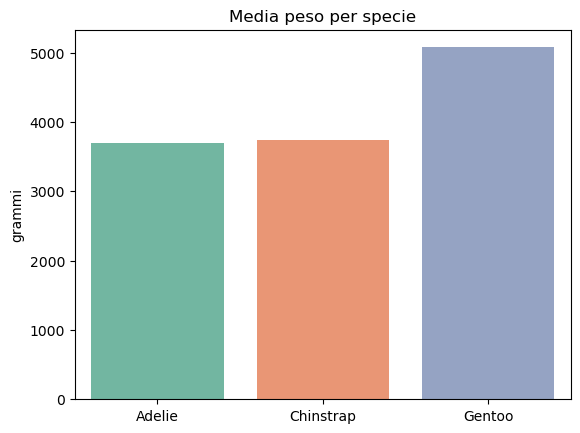

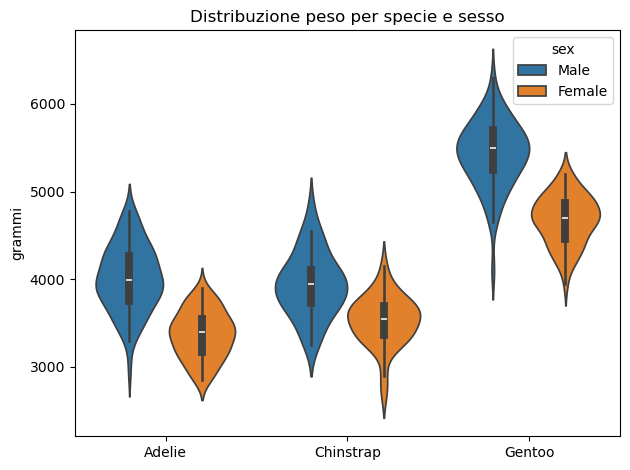

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

p = sns.load_dataset("penguins")
print(p.head())
print("Il numero di righe è: ", len(p))
print("Il numero di colonne è: ", len(p.columns))

nan=[]
for colonna in p.columns:
    n=p[colonna].isna().sum()
    nan.append(int(n))

print("Il numero di NAN per colonna è: ", nan)

moda= p["sex"].mode()[0]
p["sex"]=p["sex"].fillna(moda)
print("Ora il numero di na è: ", p["sex"].isna().sum())

p.dropna(subset="body_mass_g", inplace=True)
print("Ora il numero di na è: ", p["body_mass_g"].isna().sum())

print("Il numero di colonne duplicate è: ", p.duplicated().sum())

specie=p["species"].unique()

print("\nI valori mancanti de peso sono: ", p["body_mass_g"].isna().sum())
medie = p.groupby("species")["body_mass_g"].mean()
print("Medie del peso: ", medie)


sns.barplot(x=specie, y=medie, palette="Set2")
plt.title("Media peso per specie")
plt.ylabel("grammi")
plt.show()

sns.violinplot(data=p ,x="species", y="body_mass_g", hue="sex")
plt.title("Distribuzione peso per specie e sesso")
plt.ylabel("grammi")
plt.xlabel("")
plt.tight_layout()
plt.show()

## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

def fit_line(x, y):
    def lineare(x, a, b):
        return a*x+b
    
    parametri, _= curve_fit(lineare, x, y)
    a,b=parametri

    descrizione = "y= ", float(a), " * x + ", float(b)
    return a, b, descrizione

x = np.linspace(0, 10, 100) 
y = 3 * x + 2 + np.random.normal(0, 1, 100)

a, b, descrizione = fit_line(x,y)
print(a,b)
print(descrizione)


3.0198166296011864 1.8514451682394357
('y= ', 3.0198166296011864, ' * x + ', 1.8514451682394357)
